<a href="https://colab.research.google.com/github/Asavei16/Niblack-Algorithm/blob/main/NiblackAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmul Niblack⛄**

In [ ]:
StudentName1 = "Kiraly Natalia"
StudentName2 = "Asavei Florin"
StudentSpecialization = "TST RO"
print("This work is realised by:")
print(StudentName1," and ",StudentName2, " - ", StudentSpecialization)

This work is realised by:
Kiraly Natalia  and  Asavei Florin  -  TST RO


Importarea surselor

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 

Importul imaginii pe care urmeaza sa  fie implementat algoritmul

In [ ]:
InputIm_FileName="imagine.png"
InImg = cv2.cvtColor(cv2.imread('imagine.png'), cv2.COLOR_BGR2RGB)

Afisare imagine originala

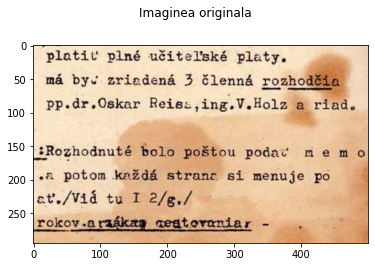

In [ ]:
plt.imshow(InImg)
plt.suptitle('Imaginea originala')
plt.show()

Afisare imagine pe nivele de gri

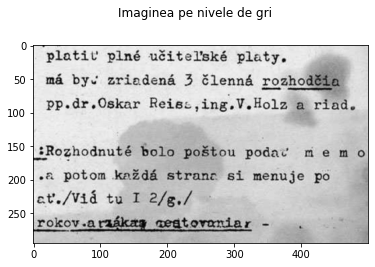

In [ ]:
#transformare
R, G, B = InImg[:,:,0], InImg[:,:,1], InImg[:,:,2]
ImgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
#afisare
plt.imshow(ImgGray, cmap='gray')
plt.suptitle('Imaginea pe nivele de gri')
plt.show()

Afisarea matricii imaginii pe nivele de gri

In [ ]:
ImgGray

array([[236.8766, 235.8767, 234.8768, ..., 211.2105, 210.8515, 212.8405],
       [234.8768, 233.8769, 232.877 , ..., 213.2103, 213.2103, 214.6123],
       [234.8768, 233.1759, 232.176 , ..., 215.2101, 215.2101, 216.6121],
       ...,
       [201.1441, 200.1442, 199.8561, ..., 151.0954, 151.0954, 153.7253],
       [201.785 , 200.1442, 199.8561, ..., 152.0953, 152.0953, 154.0843],
       [203.7848, 201.785 , 201.8559, ..., 156.0949, 154.7252, 157.0131]])

## ***I. Aplicarea algoritmului Niblack folosind functia importata din skimage (pentru compararea rezultatelor)***

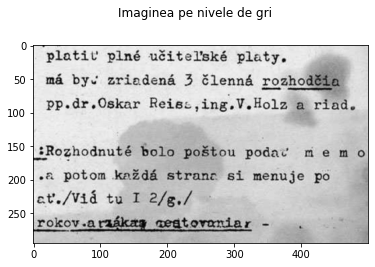

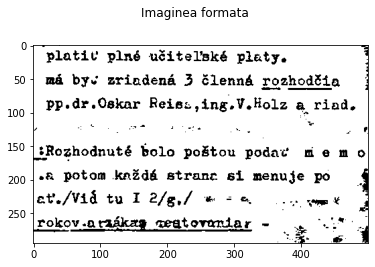

In [ ]:
from skimage.filters import (threshold_niblack)

window_size = 51 #fereastra pentru care se calculeaza pragul
thresh_niblack = threshold_niblack(ImgGray, window_size=window_size, k=0.9)

Img_niblack = ImgGray > thresh_niblack #se creeaza o imagine doar cu 0 si 1(boolean)
# se pune 1 daca e adevarata conditia, 0 in rest

#afisare imagini
plt.imshow(ImgGray,cmap='gray')
plt.suptitle('Imaginea pe nivele de gri')
plt.show()
plt.imshow(Img_niblack,cmap='gray')
plt.suptitle('Imaginea formata')
plt.show()

## ***II. Aplicarea algoritmului cu prag unic folosind algoritm propriu (pentru compararea rezultatelor)***

Calcularea mediei intregii imagini

In [ ]:
mean=ImgGray.mean()
print("Media:",str(mean))

Media: 192.38354408135592


Calculare deviatiei standard a intregii imagini

In [ ]:
stdev=ImgGray.std()
print("Deviatia standard:",str(stdev))

Deviatia standard: 47.96851149394581


Calcularea pragului unic pentru constanta k=-0.9 (determinata experimental)

In [ ]:
k=-0.9
T=mean+k*stdev
print("Pragul unic calculat:",str(T))

Pragul unic calculat: 149.21188373680468


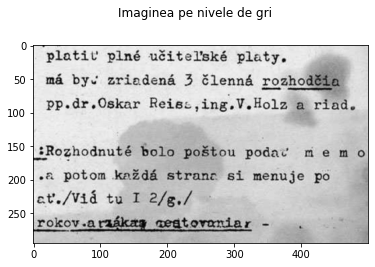

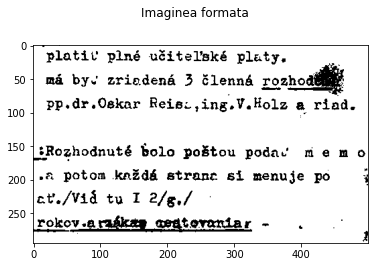

In [ ]:
Img_T_unic = ImgGray > T#se creeaza o imagine doar cu 0 si 1(boolean)
# se pune 1 daca e adevarata conditia, 0 in rest

#afisare imagini
plt.imshow(ImgGray,cmap='gray')
plt.suptitle('Imaginea pe nivele de gri')
plt.show()
plt.imshow(Img_T_unic,cmap='gray')
plt.suptitle('Imaginea formata')
plt.show()

## ***III. Aplicarea algoritmului Niblack folosind algoritm propriu***

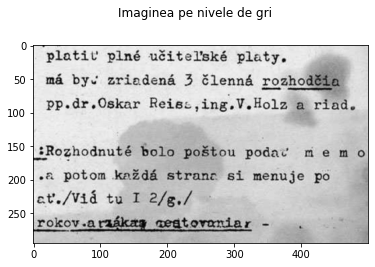

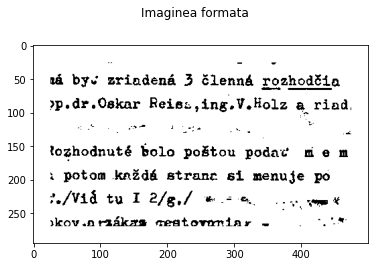

In [ ]:
from PIL import Image
k=-0.9
#se creeaza o imagine noua cu caracteristicile imaginii originale(inaltime+latime), alba
newImg= np.zeros(ImgGray.shape)+255

w = 25 #dimensiunea fereastrei care urmeaza sa fie folosita
for i in range(w+1,len(ImgGray)-w):
  for j in range(w+1,len(ImgGray[i])-w):
    formedImg=[]
    for x in range(0, len(ImgGray[i-w:i+w])): #extragerea ferestrei pentru calcularea pragului pentru fiecare fereastra
      formedImg.append(ImgGray[i-w:i+w][x][j-w:j+w]) #formare imagine noua cu dimensiunea ferestrei
    mean=np.asarray(formedImg).mean()
    stdev=np.asarray(formedImg).std()
    T=mean+k*stdev
    if ImgGray[i][j] < T:#comparare pixeli
      newImg[i][j] = 0
    else:
      newImg[i][j] = 255

#afisare imagini
plt.imshow(ImgGray,cmap='gray')
plt.suptitle('Imaginea pe nivele de gri')
plt.show()
plt.imshow(newImg,cmap='gray')
plt.suptitle('Imaginea formata')
plt.show()


## ***IV. Aplicarea algoritmului cu prag pe randuri folosind un algoritm propriu(pentru compararea rezultatelor)***

width:   500
height:  295
0
Media: 201.661281312
25
Media: 213.50107907199998
50
Media: 192.08615784000003
75
Media: 192.06852479999998
100
Media: 212.535393584
125
Media: 206.27389320799998
150
Media: 176.412590864
175
Media: 182.92348710399997
200
Media: 198.73348240800001
225
Media: 191.30361119999998
250
Media: 165.885384288
275
Media: 170.9261681


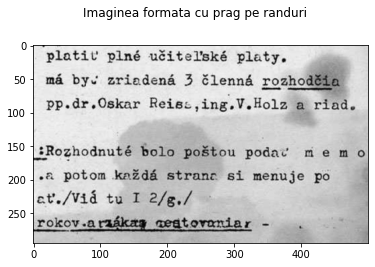

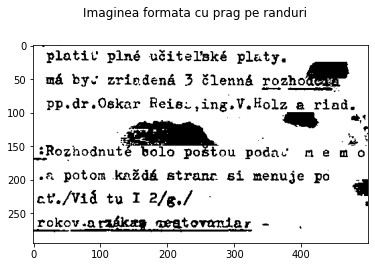

In [ ]:
k=-0.9
h,w=ImgGray.shape
print('width:  ', w) #latime in pixeli
print('height: ', h) #inaltime in pixeli

i=0
ImgWin=ImgGray.copy()
#numar de randuri pentru fiecare fereastra (dimensiunea feresrei [latime x numar randuri])
win=25

while i<h:
  mean=ImgGray[i:i+win].mean()
  print(i)
  print("Media:",str(mean))
  stdev=ImgGray[i:i+win].std()
  T=mean+k*stdev
  ImgWin[i:i+win]=ImgGray[i:i+win] > T
  i+=win
  
#afisare imagini
plt.imshow(ImgGray,cmap='gray')
plt.suptitle('Imaginea formata cu prag pe randuri')
plt.show()
plt.imshow(ImgWin,cmap='gray')
plt.suptitle('Imaginea formata cu prag pe randuri')
plt.show()



## ***V. Afisarea histogramelor pentru imaginea pe nivele de gri si pentru cele 4 metode***

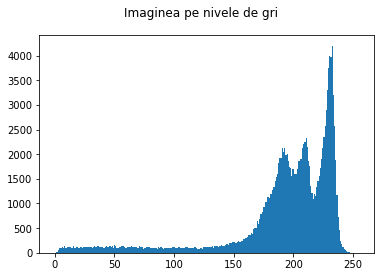

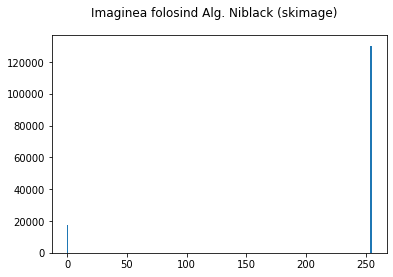

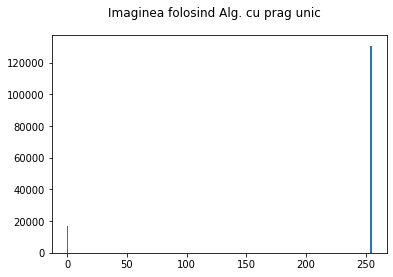

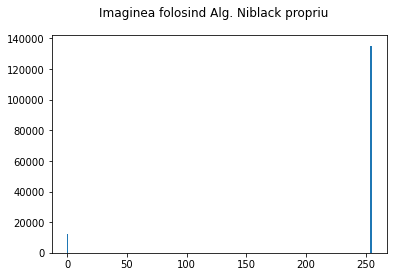

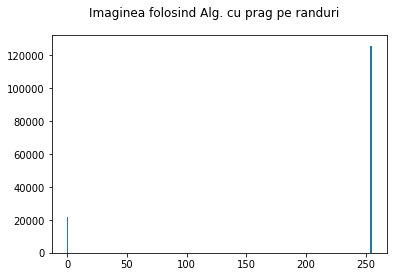

In [ ]:
plt.hist(ImgGray.ravel(), 256,[0,255])
plt.suptitle('Imaginea pe nivele de gri')
plt.show()

plt.hist(255*Img_niblack.ravel(), 256,[0,255])
plt.suptitle('Imaginea folosind Alg. Niblack (skimage)')
plt.show()

plt.hist(255*Img_T_unic.ravel(), 256,[0,255])
plt.suptitle('Imaginea folosind Alg. cu prag unic')
plt.show()

plt.hist(newImg.ravel(), 256,[0,255])
plt.suptitle('Imaginea folosind Alg. Niblack propriu')
plt.show()

plt.hist(255*ImgWin.ravel(), 256,[0,255])
plt.suptitle('Imaginea folosind Alg. cu prag pe randuri')
plt.show()